In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문화예술 데이터

In [16]:
art = pd.read_csv("./data/cultural_art_facilities_final.csv", encoding="utf-8")

## 문화시설 자치구 & 행정동 개수

In [17]:
cnt = art["county_name"].drop_duplicates()
cnt.describe()

count      25
unique     25
top       종로구
freq        1
Name: county_name, dtype: object

In [18]:
cnt = art["town_name"].drop_duplicates()
cnt.describe()

count     242
unique    242
top       소격동
freq        1
Name: town_name, dtype: object

## 박물관 & 미술관 & 도서관 & 영화관

In [19]:
a = art.groupby("data_type")["name"].describe()
print(a)

          count unique           top freq
data_type                                
도서관         332    332       성북정보도서관    1
미술관          50     50  국립현대미술관(서울관)    1
박물관         131    131       국립중앙박물관    1
영화관          77     76      CGV 압구정점    2


### 자치구 별 문화 시설 분포도

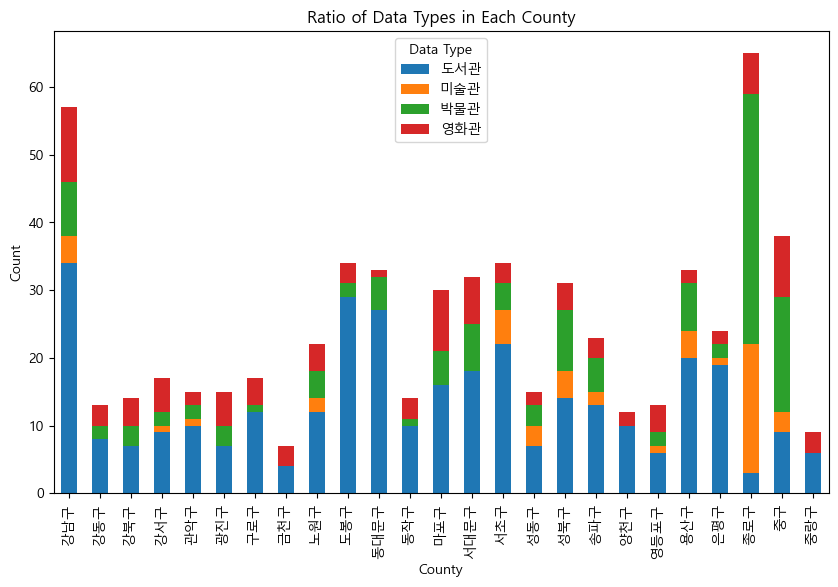

In [20]:
facilities_county_table = pd.pivot_table(art, index=['county_name'], columns=['data_type'], aggfunc='size', fill_value=0)

# stacked bar chart로 시각화
facilities_county_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Ratio of Data Types in Each County')
plt.legend(title='Data Type')

plt.show()

### 자치구 별 문화시설 분포도

In [21]:
town_data_type_counts = art.groupby(['town_name', 'data_type']).size().unstack(fill_value=0)
town_data_type_counts

data_type,도서관,미술관,박물관,영화관
town_name,,,,
가락동,1,0,1,0
가산동,1,0,0,2
가양동,1,0,1,0
가회동,0,0,3,0
갈월동,1,0,0,0
...,...,...,...,...
효제동,0,0,0,1
효창동,1,1,1,0
후암동,3,0,0,0


In [22]:
town_data_type_counts.describe()

data_type,도서관,미술관,박물관,영화관
count,242.000000,242.000000,242.000000,242.000000
mean,1.371901,0.206612,0.541322,0.429752
std,1.565352,0.522003,0.859622,0.765723
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,1.000000
max,10.000000,4.000000,5.000000,5.000000


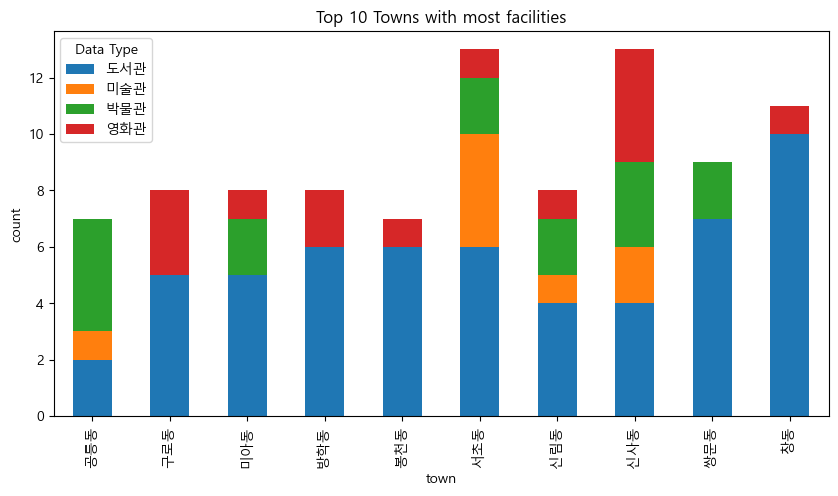

In [23]:
top_towns = art.groupby('town_name')['data_type'].value_counts().unstack(fill_value=0).sum(axis=1).nlargest(10).index
top_towns_data = art[art['town_name'].isin(top_towns)].groupby(['town_name', 'data_type']).size().unstack(fill_value=0)

# stacked bar chart
top_towns_data.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.xlabel('town')
plt.ylabel('count')
plt.title('Top 10 Towns with most facilities')
plt.legend(title='Data Type')
plt.show()

# 박물관 

### 동 별 & 자치구 별 - 박물관 

In [133]:
county_counts = art[art['data_type'] == '박물관'].groupby('county_name').size().reset_index(name='museum_count')
town_counts = art[art['data_type'] == '박물관'].groupby('town_name').size().reset_index(name='museum_count')

In [134]:
town_counts.describe()

,museum_count
count,91.000000
mean,1.439560
std,0.819333
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


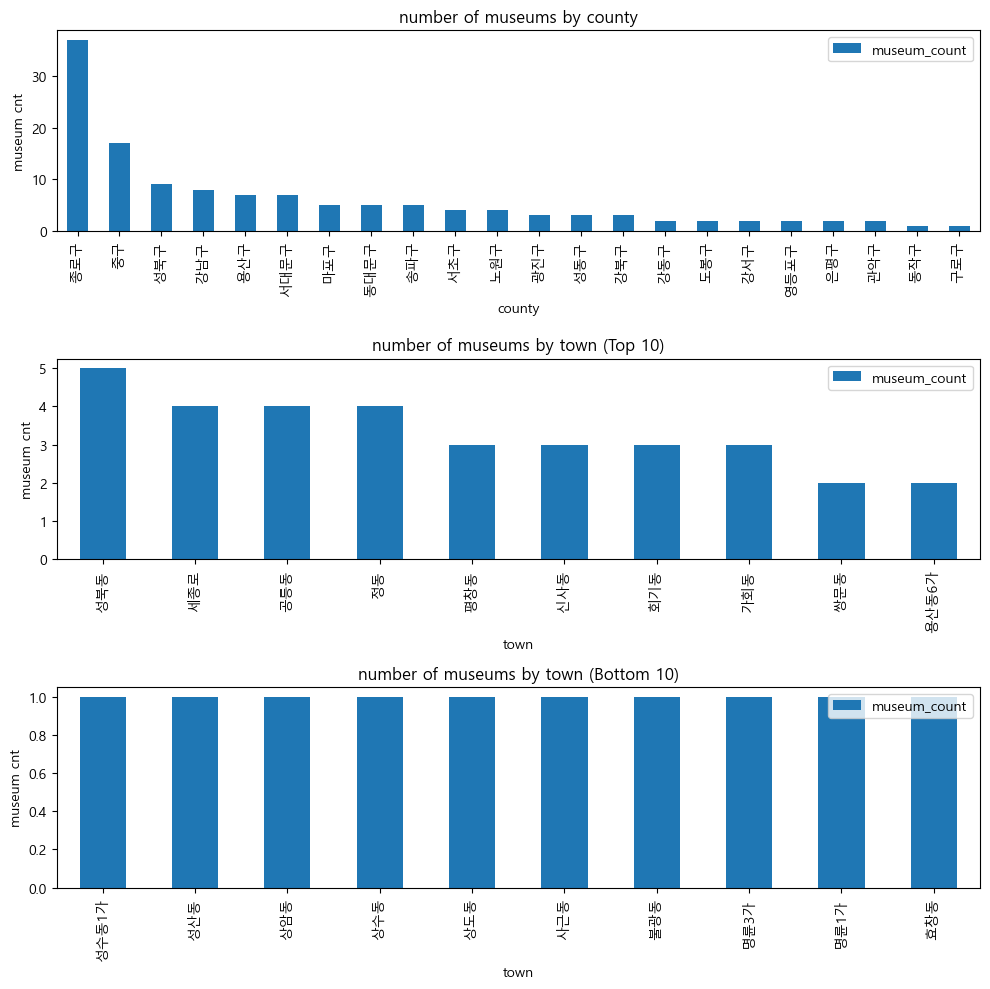

In [135]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
county_counts.sort_values(by='museum_count', ascending=False).plot(kind='bar', x='county_name', y='museum_count', ax=axes[0])
axes[0].set_title('number of museums by county')
axes[0].set_xlabel('county')
axes[0].set_ylabel('museum cnt')

town_counts.sort_values(by='museum_count', ascending=False).head(10).plot(kind='bar', x='town_name', y='museum_count', ax=axes[1])
axes[1].set_title('number of museums by town (Top 10)')
axes[1].set_xlabel('town')
axes[1].set_ylabel('museum cnt')

town_counts.sort_values(by='museum_count', ascending=False).tail(10).plot(kind='bar', x='town_name', y='museum_count', ax=axes[2])
axes[2].set_title('number of museums by town (Bottom 10)')
axes[2].set_xlabel('town')
axes[2].set_ylabel('museum cnt')

plt.tight_layout()
plt.show()

### 박물관 타입 별 분포도

In [136]:
mus_df = art[art["data_type"]=="박물관"]

In [137]:
type_counts = mus_df.groupby('type')
type_counts.describe()

Unnamed: 0                                                            x  \
          count   mean        std    min     25%    50%     75%    max count   
type                                                                           
공립         20.0   74.5   5.916080   65.0   69.75   74.5   79.25   84.0  20.0   
국립         15.0   57.0   4.472136   50.0   53.50   57.0   60.50   64.0  15.0   
대학         28.0  166.5   8.225975  153.0  159.75  166.5  173.25  180.0  28.0   
사립         68.0  118.5  19.773720   85.0  101.75  118.5  135.25  152.0  68.0   

                  ...          y            h_code                \
            mean  ...        75%        max  count          mean   
type              ...                                              
공립    127.009839  ...  37.580767  37.652430   20.0  1.131985e+09   
국립    126.981502  ...  37.575153  37.627244   15.0  1.126657e+09   
대학    127.012679  ...  37.607683  37.652470   28.0  1.128741e+09   
사립    126.990374  ...  37.584117  37.653816   68.0  1.130317e+09   

                                                                            \
               std           min           25%           50%           75%   
type                                                                         
공립    2.082117e+07  1.111053e+09  1.114068e+09  1.126054e+09  1.141054e+09   
국립    2.121957e+07  1.111052e+09  1.111057e+09  1.114058e+09  1.139567e+09   
대학    1.298302e+07  1.111056e+09  1.121192e+09  1.129059e+09  1.135060e+09   
사립    2.338464e+07  1.111054e+09  1.111062e+09  1.114056e+09  1.150814e+09   

                    
               max  
type                
공립    1.174058e+09  
국립    1.168053e+09  
대학    1.162074e+09  
사립    1.174055e+09  

[4 rows x 32 columns]

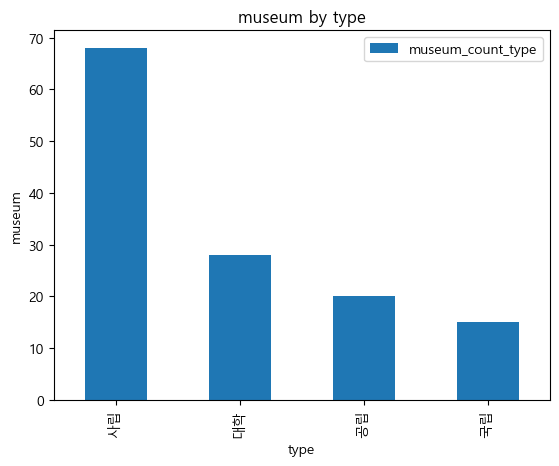

In [138]:
type_counts = mus_df.groupby('type').size().reset_index(name='museum_count_type')

type_counts.sort_values(by='museum_count_type', ascending=False).plot(kind='bar', x='type', y='museum_count_type')
plt.title('museum by type')
plt.xlabel('type')
plt.ylabel('museum')
plt.show()

# 미술관

### 동 별 & 자치구 별 - 미술관 

In [139]:
county_counts = art[art['data_type'] == '미술관'].groupby('county_name').size().reset_index(name='museum_count')
town_counts = art[art['data_type'] == '미술관'].groupby('town_name').size().reset_index(name='museum_count')

In [140]:
town_counts.describe()

,museum_count
count,40.000000
mean,1.250000
std,0.588348
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


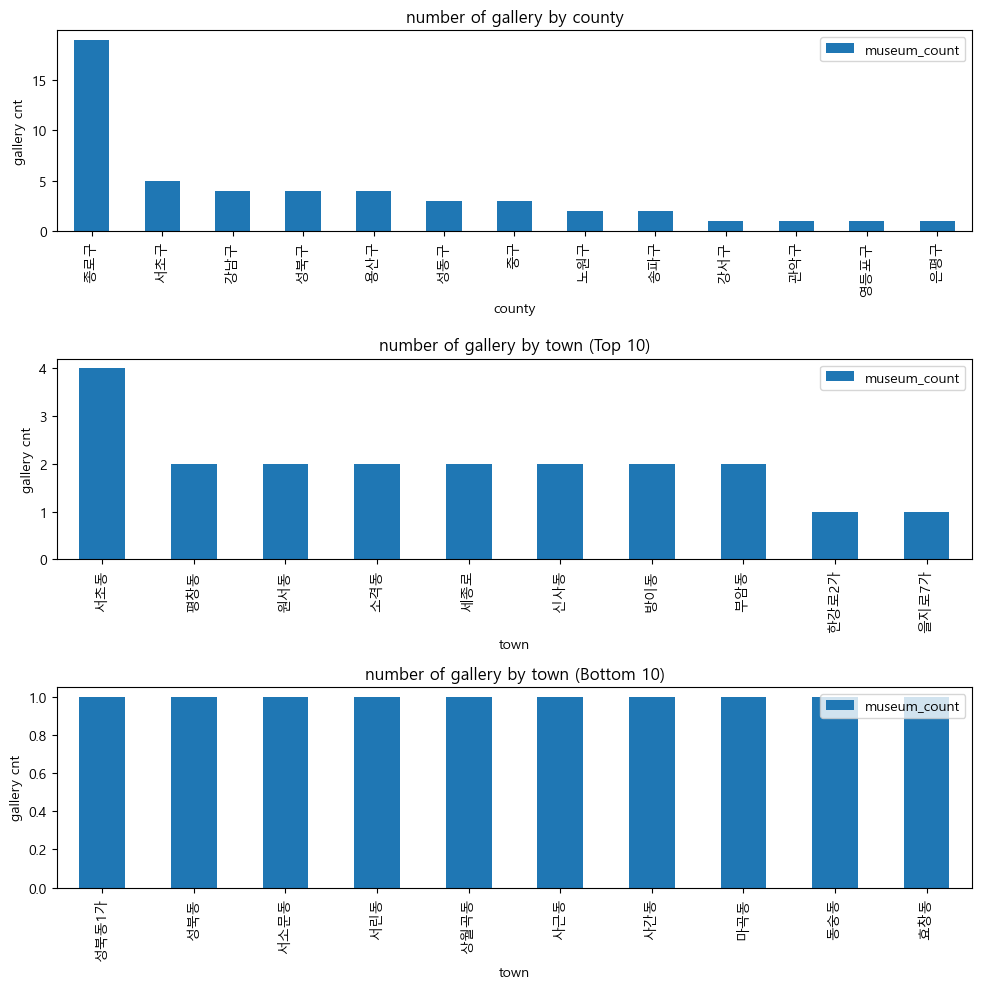

In [141]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
county_counts.sort_values(by='museum_count', ascending=False).plot(kind='bar', x='county_name', y='museum_count', ax=axes[0])
axes[0].set_title('number of gallery by county')
axes[0].set_xlabel('county')
axes[0].set_ylabel('gallery cnt')

town_counts.sort_values(by='museum_count', ascending=False).head(10).plot(kind='bar', x='town_name', y='museum_count', ax=axes[1])
axes[1].set_title('number of gallery by town (Top 10)')
axes[1].set_xlabel('town')
axes[1].set_ylabel('gallery cnt')

town_counts.sort_values(by='museum_count', ascending=False).tail(10).plot(kind='bar', x='town_name', y='museum_count', ax=axes[2])
axes[2].set_title('number of gallery by town (Bottom 10)')
axes[2].set_xlabel('town')
axes[2].set_ylabel('gallery cnt')

plt.tight_layout()
plt.show()

### 미술관 타입 별 분포도

In [142]:
art_df = art[art["data_type"]=="미술관"]

In [143]:
type_counts = art_df.groupby('type')
type_counts.describe()

Unnamed: 0                                                     x  \
          count  mean       std   min    25%   50%    75%   max count   
type                                                                    
공립          9.0   6.0  2.738613   2.0   4.00   6.0   8.00  10.0   9.0   
국립          2.0   0.5  0.707107   0.0   0.25   0.5   0.75   1.0   2.0   
대학          5.0  47.0  1.581139  45.0  46.00  47.0  48.00  49.0   5.0   
사립         34.0  27.5  9.958246  11.0  19.25  27.5  35.75  44.0  34.0   

                  ...          y            h_code                \
            mean  ...        75%        max  count          mean   
type              ...                                              
공립    126.981399  ...  37.594837  37.610660    9.0  1.124058e+09   
국립    126.976907  ...  37.575493  37.578628    2.0  1.112553e+09   
대학    127.018759  ...  37.630251  37.633079    5.0  1.133860e+09   
사립    127.002151  ...  37.577698  37.630070   34.0  1.132412e+09   

                                                                            \
               std           min           25%           50%           75%   
type                                                                         
공립    1.281811e+07  1.111052e+09  1.114052e+09  1.129052e+09  1.129064e+09   
국립    2.119906e+06  1.111054e+09  1.111804e+09  1.112553e+09  1.113302e+09   
대학    1.783148e+07  1.117056e+09  1.120055e+09  1.135057e+09  1.135061e+09   
사립    2.599364e+07  1.111053e+09  1.111056e+09  1.117060e+09  1.165053e+09   

                    
               max  
type                
공립    1.150060e+09  
국립    1.114052e+09  
대학    1.162074e+09  
사립    1.171057e+09  

[4 rows x 32 columns]

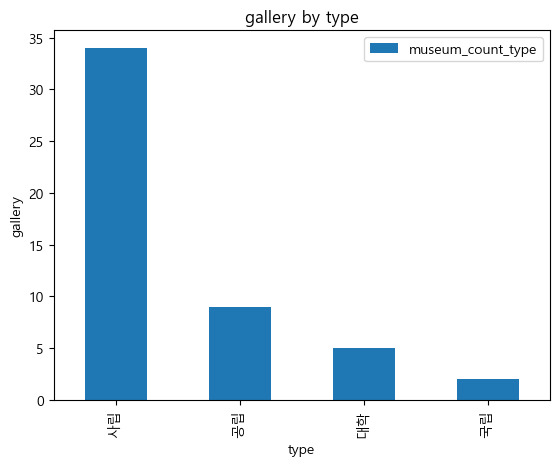

In [144]:
type_counts = art_df.groupby('type').size().reset_index(name='museum_count_type')

type_counts.sort_values(by='museum_count_type', ascending=False).plot(kind='bar', x='type', y='museum_count_type')
plt.title('gallery by type')
plt.xlabel('type')
plt.ylabel('gallery')
plt.show()

# 도서관

### 동 별 & 자치구 별 - 도서관 

In [145]:
county_counts = art[art['data_type'] == '도서관'].groupby('county_name').size().reset_index(name='museum_count')
town_counts = art[art['data_type'] == '도서관'].groupby('town_name').size().reset_index(name='museum_count')

In [146]:
town_counts.describe()

,museum_count
count,165.000000
mean,2.012121
std,1.518134
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,10.000000


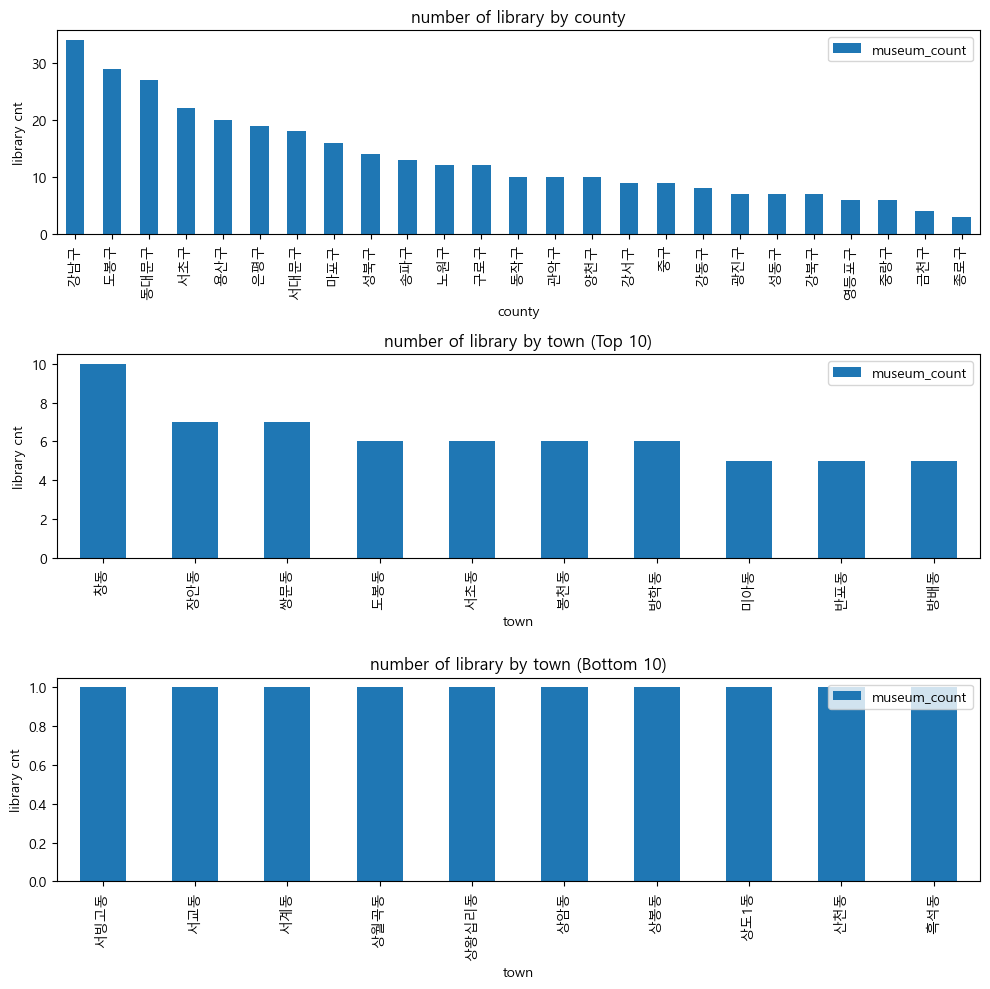

In [147]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
county_counts.sort_values(by='museum_count', ascending=False).plot(kind='bar', x='county_name', y='museum_count', ax=axes[0])
axes[0].set_title('number of library by county')
axes[0].set_xlabel('county')
axes[0].set_ylabel('library cnt')

town_counts.sort_values(by='museum_count', ascending=False).head(10).plot(kind='bar', x='town_name', y='museum_count', ax=axes[1])
axes[1].set_title('number of library by town (Top 10)')
axes[1].set_xlabel('town')
axes[1].set_ylabel('library cnt')

town_counts.sort_values(by='museum_count', ascending=False).tail(10).plot(kind='bar', x='town_name', y='museum_count', ax=axes[2])
axes[2].set_title('number of library by town (Bottom 10)')
axes[2].set_xlabel('town')
axes[2].set_ylabel('library cnt')

plt.tight_layout()
plt.show()

### 도서관 타입 별 분포도

In [148]:
lib_df = art[art["data_type"]=="도서관"]

In [149]:
type_counts = lib_df.groupby('type')
type_counts.describe()

Unnamed: 0                                                             \
          count        mean         std    min    25%    50%    75%    max   
type                                                                         
공공        193.0  348.891192  100.893578  181.0  256.0  348.0  441.0  512.0   
작은        139.0  343.179856   88.971600  184.0  278.5  345.0  419.5  505.0   

          x              ...          y            h_code                \
      count        mean  ...        75%        max  count          mean   
type                     ...                                              
공공    193.0  126.997453  ...  37.598830  37.687667  193.0  1.143907e+09   
작은    139.0  127.001095  ...  37.596416  37.681570  139.0  1.141882e+09   

                                                                            \
               std           min           25%           50%           75%   
type                                                                         
공공    1.846971e+07  1.111053e+09  1.129068e+09  1.144066e+09  1.159065e+09   
작은    1.821139e+07  1.114058e+09  1.123074e+09  1.138063e+09  1.163564e+09   

                    
               max  
type                
공공    1.174070e+09  
작은    1.171059e+09  

[2 rows x 32 columns]

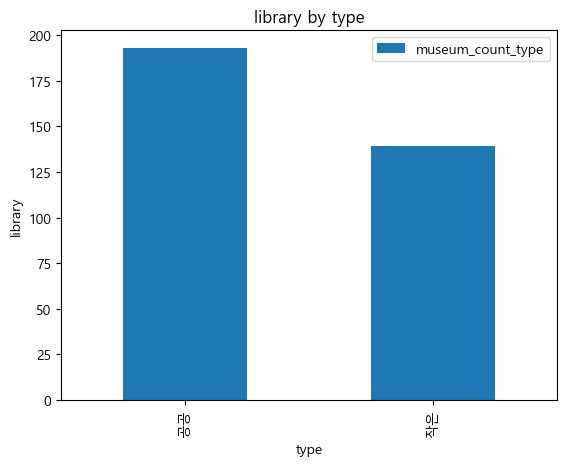

In [150]:
type_counts = lib_df.groupby('type').size().reset_index(name='museum_count_type')

type_counts.sort_values(by='museum_count_type', ascending=False).plot(kind='bar', x='type', y='museum_count_type')
plt.title('library by type')
plt.xlabel('type')
plt.ylabel('library')
plt.show()

# 영화관

### 동 별 & 자치구 별 - 영화관 

In [27]:
county_counts = art[art['data_type'] == '영화관'].groupby('county_name').size().reset_index(name='museum_count')
town_counts = art[art['data_type'] == '영화관'].groupby('town_name').size().reset_index(name='museum_count')

In [28]:
town_counts.describe()

,museum_count
count,74.000000
mean,1.405405
std,0.738731
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


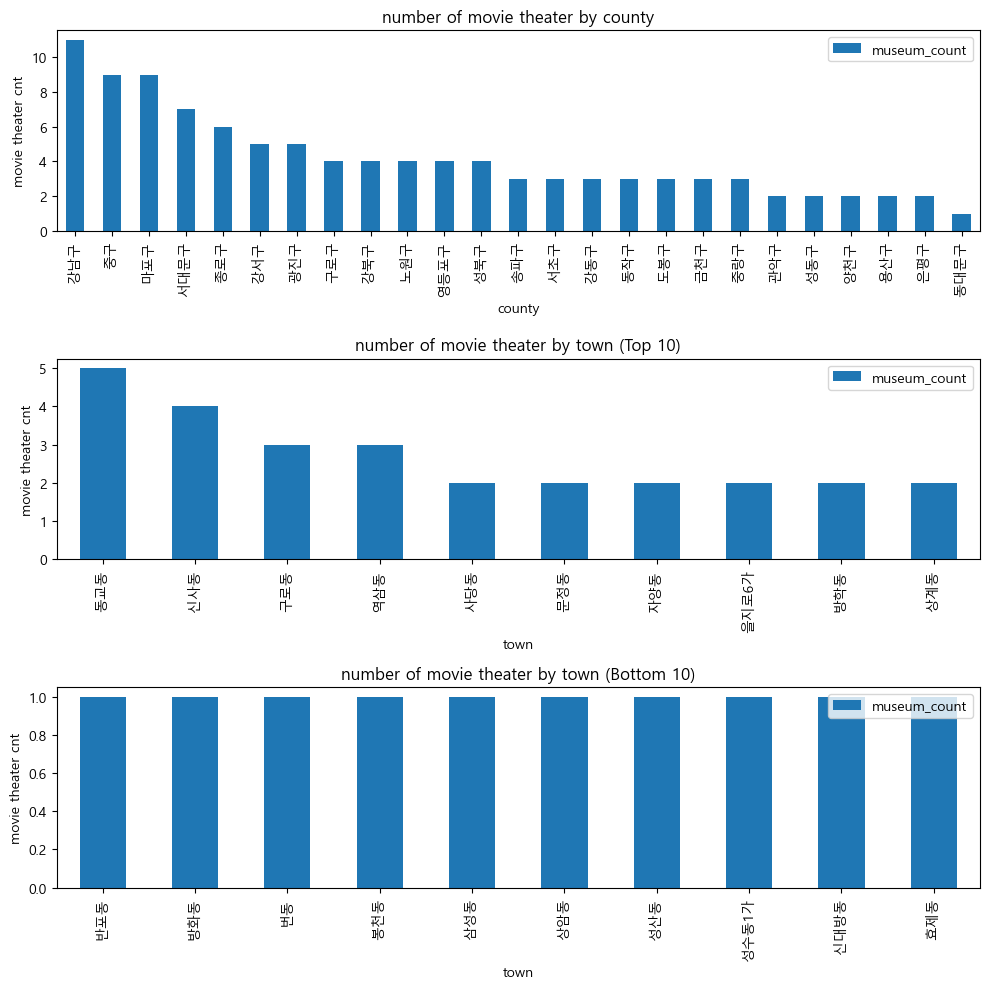

In [29]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
county_counts.sort_values(by='museum_count', ascending=False).plot(kind='bar', x='county_name', y='museum_count', ax=axes[0])
axes[0].set_title('number of movie theater by county')
axes[0].set_xlabel('county')
axes[0].set_ylabel('movie theater cnt')

town_counts.sort_values(by='museum_count', ascending=False).head(10).plot(kind='bar', x='town_name', y='museum_count', ax=axes[1])
axes[1].set_title('number of movie theater by town (Top 10)')
axes[1].set_xlabel('town')
axes[1].set_ylabel('movie theater cnt')

town_counts.sort_values(by='museum_count', ascending=False).tail(10).plot(kind='bar', x='town_name', y='museum_count', ax=axes[2])
axes[2].set_title('number of movie theater by town (Bottom 10)')
axes[2].set_xlabel('town')
axes[2].set_ylabel('movie theater cnt')

plt.tight_layout()
plt.show()

### 영화관 타입 별 분포도

In [24]:
mov_df = art[art["data_type"]=="영화관"]

In [25]:
type_counts = mov_df.groupby('type')
type_counts.describe()

Unnamed: 0.1                                                       \
                count        mean        std    min     25%    50%     75%   
type                                                                         
CGV              30.0  571.966667  54.683720  513.0  530.25  553.5  598.50   
롯데시네마            24.0  569.750000  48.567524  515.0  536.00  567.5  591.25   
메가박스             20.0  585.800000  52.799123  520.0  535.75  596.0  609.00   
일반극장/영화관         30.0  643.133333  84.039701  514.0  549.25  638.0  726.25   

                Unnamed: 0              ...          y            h_code  \
            max      count        mean  ...        75%        max  count   
type                                    ...                                
CGV       733.0       30.0  571.966667  ...  37.590296  37.665356   30.0   
롯데시네마     723.0       24.0  569.750000  ...  37.574577  37.676589   24.0   
메가박스      725.0       20.0  585.800000  ...  37.559441  37.654602   20.0   
일반극장/영화관  736.0       30.0  643.133333  ...  37.571259  37.668127   30.0   

                                                                  \
                  mean           std           min           25%   
type                                                               
CGV       1.138761e+09  2.030172e+07  1.111062e+09  1.121585e+09   
롯데시네마     1.146312e+09  1.785203e+07  1.114052e+09  1.133937e+09   
메가박스      1.148335e+09  1.820396e+07  1.114059e+09  1.138807e+09   
일반극장/영화관  1.136510e+09  1.892172e+07  1.111053e+09  1.115936e+09   

                                                    
                   50%           75%           max  
type                                                
CGV       1.135062e+09  1.155304e+09  1.174060e+09  
롯데시네마     1.150059e+09  1.159815e+09  1.174065e+09  
메가박스      1.148552e+09  1.165054e+09  1.174064e+09  
일반극장/영화관  1.141058e+09  1.150810e+09  1.168065e+09  

[4 rows x 40 columns]

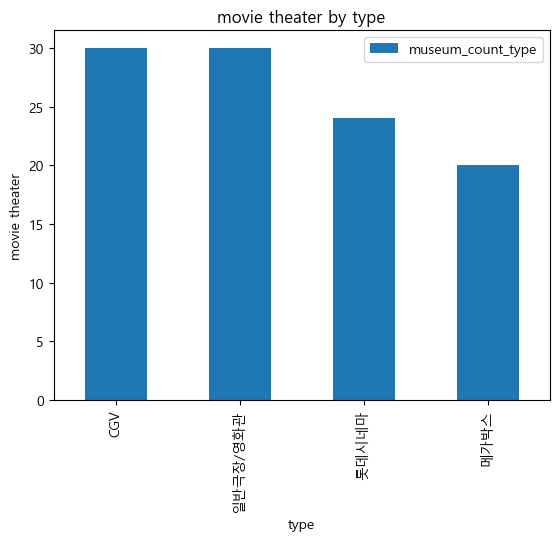

In [26]:
type_counts = mov_df.groupby('type').size().reset_index(name='museum_count_type')

type_counts.sort_values(by='museum_count_type', ascending=False).plot(kind='bar', x='type', y='museum_count_type')
plt.title('movie theater by type')
plt.xlabel('type')
plt.ylabel('movie theater')
plt.show()

# 마트

In [160]:
market = pd.read_csv("./data/market_final_27.csv")
market.head()

,id,name,address,city_name,county_name,town_name,type,x,y,data_type,h_code
0,0,마리오아울렛 1관,서울특별시 금천구 디지털로 185,서울,금천구,가산동,쇼핑센터,126.887253,37.478127,마트,1154551000
1,1,마리오아울렛 3관,서울특별시 금천구 벚꽃로 266,서울,금천구,가산동,쇼핑센터,126.885081,37.478446,마트,1154551000
2,2,롯데슈퍼 목동2점,서울특별시 양천구 목동서로 100,서울,양천구,목동,구분없음,126.874169,37.534224,마트,1147055000
3,3,영등포유통상가,서울특별시 영등포구 영등포로 109,서울,영등포구,당산동2가,그 밖의 대규모점포,126.893930,37.522417,마트,1156055000
4,4,롯데슈퍼 방배2점,서울특별시 방배로33길 29,서울,서초구,방배동,대형마트,126.989271,37.491242,마트,1165062100


In [161]:
market.describe()

,id,x,y,h_code
count,639.000000,639.000000,639.000000,6.390000e+02
mean,369.868545,126.990362,37.546179,1.143599e+09
std,215.218395,0.083394,0.048510,1.963052e+07
min,0.000000,126.802960,37.437777,1.111053e+09
25%,174.500000,126.917877,37.506881,1.126062e+09
50%,374.000000,127.008079,37.541761,1.147052e+09
75%,557.500000,127.053085,37.572691,1.159066e+09
max,728.000000,127.164510,37.684345,1.174068e+09


### 마트 - 행정동 개수

In [162]:
cnt = market["town_name"].drop_duplicates()
cnt.describe()

count     197
unique    197
top       가산동
freq        1
Name: town_name, dtype: object

### 마트 - 자치구 개수

In [163]:
cnt = market["county_name"].drop_duplicates()
cnt.describe()

count      25
unique     25
top       금천구
freq        1
Name: county_name, dtype: object

### 마트 타입 별 분포도

In [164]:
type_counts = market.groupby('type')
type_counts.describe()

id                                                              \
            count        mean         std   min     25%    50%     75%    max   
type                                                                            
구분없음        130.0  328.984615  243.210630   2.0   78.50  329.5  515.75  726.0   
그 밖의 대규모점포  283.0  402.893993  208.011907   3.0  209.50  427.0  591.50  728.0   
대형마트         58.0  362.189655  184.316990   4.0  225.75  359.0  512.50  694.0   
백화점          19.0  349.631579  264.351872   6.0   45.50  413.0  528.00  719.0   
복합쇼핑몰        26.0  387.769231  218.391448  35.0  219.75  381.0  619.00  713.0   
쇼핑센터         39.0  319.205128  235.271420   0.0  133.00  209.0  518.00  727.0   
시장           61.0  352.377049  159.386131  12.0  234.00  346.0  480.00  650.0   
전문점          22.0  342.090909  220.755393  36.0  210.50  258.5  561.75  725.0   

                x              ...          y            h_code                \
            count        mean  ...        75%        max  count          mean   
type                           ...                                              
구분없음        130.0  126.982895  ...  37.579680  37.684345  130.0  1.141501e+09   
그 밖의 대규모점포  283.0  126.998895  ...  37.570755  37.665852  283.0  1.145588e+09   
대형마트         58.0  126.976037  ...  37.578589  37.664212   58.0  1.144450e+09   
백화점          19.0  126.965682  ...  37.560553  37.639858   19.0  1.143902e+09   
복합쇼핑몰        26.0  127.000617  ...  37.575740  37.640337   26.0  1.144464e+09   
쇼핑센터         39.0  126.979007  ...  37.567034  37.622947   39.0  1.142675e+09   
시장           61.0  126.977298  ...  37.604183  37.680308   61.0  1.140718e+09   
전문점          22.0  127.024190  ...  37.571107  37.611373   22.0  1.136906e+09   

                                                                    \
                     std           min           25%           50%   
type                                                                 
구분없음        1.864968e+07  1.111062e+09  1.123074e+09  1.142564e+09   
그 밖의 대규모점포  2.059960e+07  1.111057e+09  1.126067e+09  1.150060e+09   
대형마트        1.747135e+07  1.114055e+09  1.130563e+09  1.147061e+09   
백화점         1.799014e+07  1.114052e+09  1.126810e+09  1.150059e+09   
복합쇼핑몰       2.034271e+07  1.111062e+09  1.130562e+09  1.144060e+09   
쇼핑센터        2.188613e+07  1.111063e+09  1.118562e+09  1.150051e+09   
시장          1.659450e+07  1.111063e+09  1.129066e+09  1.138055e+09   
전문점         2.146703e+07  1.111053e+09  1.120439e+09  1.129075e+09   

                                        
                     75%           max  
type                                    
구분없음        1.156058e+09  1.174064e+09  
그 밖의 대규모점포  1.165057e+09  1.174068e+09  
대형마트        1.156065e+09  1.174068e+09  
백화점         1.156052e+09  1.168065e+09  
복합쇼핑몰       1.166552e+09  1.171068e+09  
쇼핑센터        1.162054e+09  1.174068e+09  
시장          1.153077e+09  1.171071e+09  
전문점         1.153067e+09  1.174068e+09  

[8 rows x 32 columns]

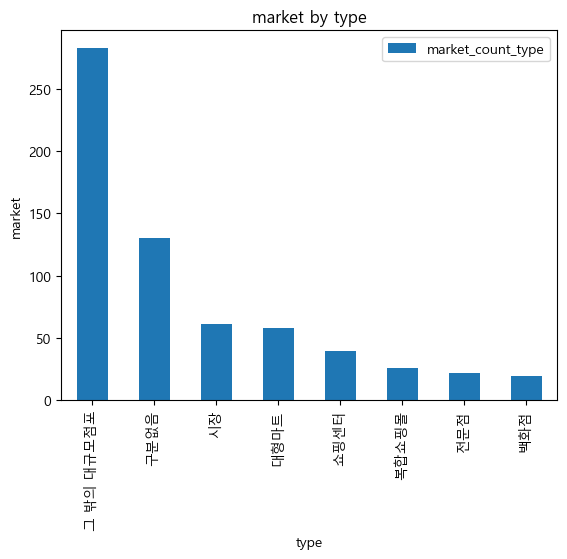

In [165]:
type_counts = market.groupby('type').size().reset_index(name='market_count_type')

type_counts.sort_values(by='market_count_type', ascending=False).plot(kind='bar', x='type', y='market_count_type')
plt.title('market by type')
plt.xlabel('type')
plt.ylabel('market')
plt.show()

### 동 별 & 구 별 - 마트

In [166]:
county_counts = market.groupby('county_name').size().reset_index(name='market_count')
town_counts = market.groupby('town_name').size().reset_index(name='market_count')

In [167]:
county_counts.describe()

,market_count
count,25.000000
mean,25.560000
std,11.923646
min,14.000000
25%,17.000000
50%,21.000000
75%,27.000000
max,57.000000


In [168]:
town_counts.describe()

,market_count
count,197.000000
mean,3.243655
std,3.054191
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,19.000000


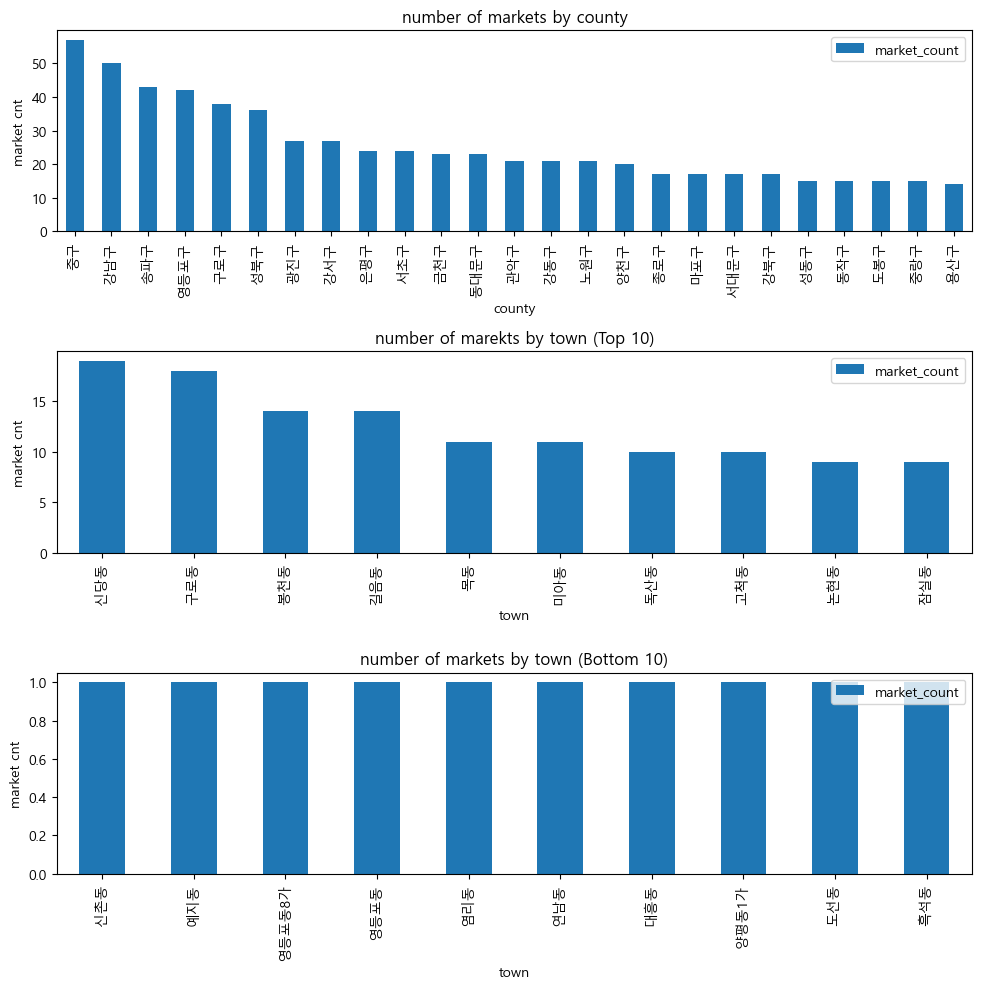

In [169]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
county_counts.sort_values(by='market_count', ascending=False).plot(kind='bar', x='county_name', y='market_count', ax=axes[0])
axes[0].set_title('number of markets by county')
axes[0].set_xlabel('county')
axes[0].set_ylabel('market cnt')

town_counts.sort_values(by='market_count', ascending=False).head(10).plot(kind='bar', x='town_name', y='market_count', ax=axes[1])
axes[1].set_title('number of marekts by town (Top 10)')
axes[1].set_xlabel('town')
axes[1].set_ylabel('market cnt')

town_counts.sort_values(by='market_count', ascending=False).tail(10).plot(kind='bar', x='town_name', y='market_count', ax=axes[2])
axes[2].set_title('number of markets by town (Bottom 10)')
axes[2].set_xlabel('town')
axes[2].set_ylabel('market cnt')

plt.tight_layout()
plt.show()

In [211]:
# Count the number of markets in each town
town_market_counts = market['town_name'].value_counts()
town_market_counts 

town_name
서초동      122
신림동      112
봉천동      111
상계동      110
역삼동      103
        ... 
쌍림동        1
필동2가       1
의주로1가      1
충무로5가      1
보문동4가      1
Name: count, Length: 355, dtype: int64

In [210]:
# Filter data for '혜화동'
hyehwa_data = market[market['town_name'] == '혜화동']
hyehwa_data

,name,address,city_name,county_name,town_name,x,y,data_type,h_code
1178,혜화약국,"서울특별시 종로구 혜화로 8,",서울,종로구,혜화동,37.586487,37.586487,약국,1.111065e+09
1675,스타약국,"서울특별시 종로구 대학로 146, 혜화동씨티밸리 102-2호",서울,종로구,혜화동,37.584249,37.584249,약국,1.111065e+09
3236,성진약국,"서울특별시 종로구 창경궁로 271-1,",서울,종로구,혜화동,37.585568,37.585568,약국,1.111065e+09
5492,건강약국,"서울특별시 종로구 혜화로 2, 1층",서울,종로구,혜화동,37.586088,37.586088,약국,1.111065e+09


In [212]:
# Set up the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='town_name', y='name', data=hyehwa_data)
plt.title('Distribution of Market Numbers in 혜화동')
plt.xlabel('Town Name')
plt.ylabel('Number of Markets')

# Show the plot
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1200x600 with 0 Axes>

# 약국

In [171]:
apotheke = pd.read_csv("./data/pharmacies_final_27.csv")
apotheke.describe()

,x,y,h_code
count,5555.000000,5555.000000,5.555000e+03
mean,39.703865,37.546014,1.146110e+09
std,13.726157,0.050519,1.927748e+07
min,37.441348,37.441348,1.111052e+09
25%,37.504803,37.504127,1.129070e+09
50%,37.542848,37.541126,1.150051e+09
75%,37.581562,37.577732,1.165053e+09
max,127.173058,37.687110,1.174070e+09


### 약국 - 행정동 개수

In [176]:
cnt = apotheke["town_name"].drop_duplicates()
cnt.describe()

count     355
unique    355
top       청담동
freq        1
Name: town_name, dtype: object

### 약국 - 자치구 개수

In [177]:
cnt = apotheke["county_name"].drop_duplicates()
cnt.describe()

count      25
unique     25
top       강남구
freq        1
Name: county_name, dtype: object

### 동 별 & 구 별 - 약국

In [178]:
county_counts = apotheke.groupby('county_name').size().reset_index(name='market_count')
town_counts = apotheke.groupby('town_name').size().reset_index(name='market_count')

In [179]:
town_counts.describe()

,market_count
count,355.000000
mean,15.647887
std,21.063597
min,1.000000
25%,2.000000
50%,7.000000
75%,20.500000
max,122.000000


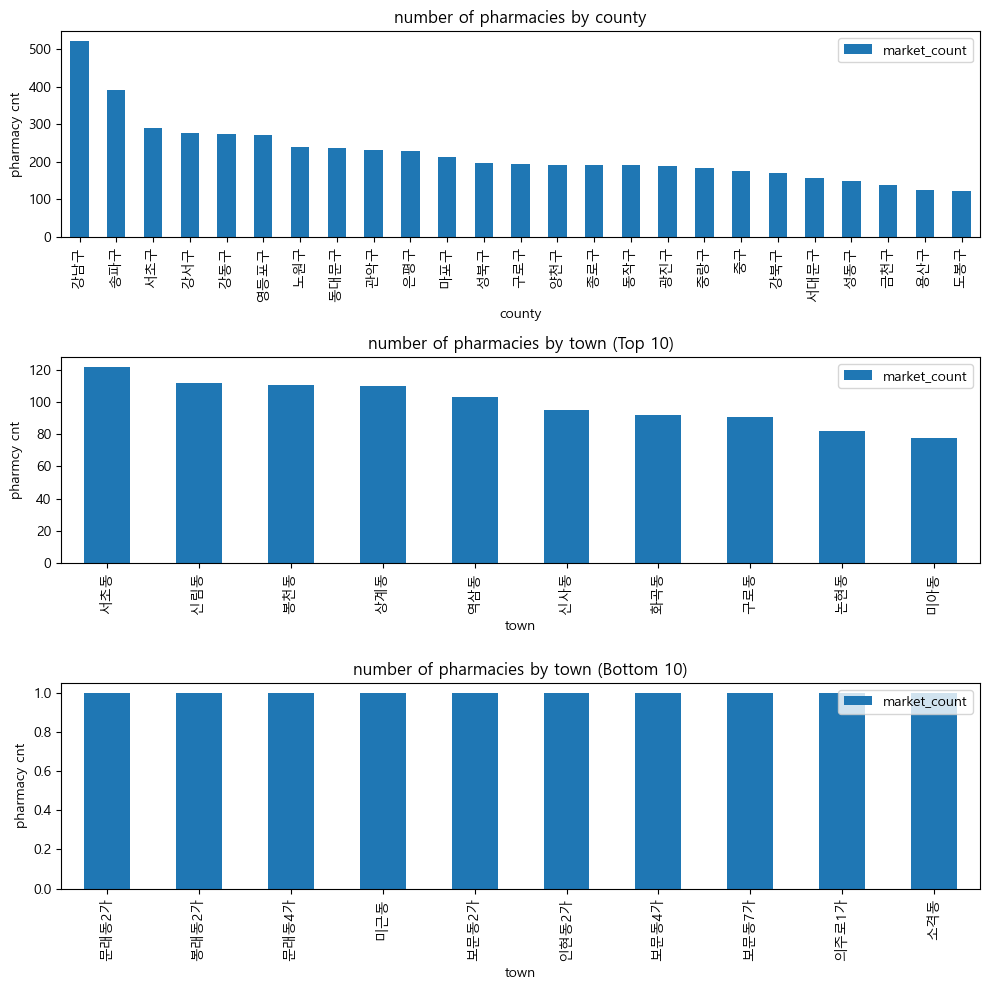

In [180]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
county_counts.sort_values(by='market_count', ascending=False).plot(kind='bar', x='county_name', y='market_count', ax=axes[0])
axes[0].set_title('number of pharmacies by county')
axes[0].set_xlabel('county')
axes[0].set_ylabel('pharmacy cnt')

town_counts.sort_values(by='market_count', ascending=False).head(10).plot(kind='bar', x='town_name', y='market_count', ax=axes[1])
axes[1].set_title('number of pharmacies by town (Top 10)')
axes[1].set_xlabel('town')
axes[1].set_ylabel('pharmcy cnt')

town_counts.sort_values(by='market_count', ascending=False).tail(10).plot(kind='bar', x='town_name', y='market_count', ax=axes[2])
axes[2].set_title('number of pharmacies by town (Bottom 10)')
axes[2].set_xlabel('town')
axes[2].set_ylabel('pharmacy cnt')

plt.tight_layout()
plt.show()

### 마트 boxplot

### 약국 면접 비율

In [192]:
market = pd.read_csv('./data/pharmacies_final_27.csv')
town_area = pd.read_csv('./data/county_area.csv')

In [193]:
town_area = town_area[["city_name", "county_name", "town_name", "Subtotal"]]

In [194]:
# Merge the two dataframes on 'county_name' and 'town_name'
merged_data = pd.merge(market, town_area, on=['county_name', 'town_name'], how='left')

In [196]:
# Calculate the ratio of each town's number of markets by the town's area size
merged_data['market_ratio'] = merged_data.groupby(['county_name', 'town_name'])['name'].transform('count') / merged_data['Subtotal']*1000000

In [197]:
merged_data

,name,address,city_name_x,county_name,town_name,x,y,data_type,h_code,city_name_y,Subtotal,market_ratio
0,청담장수 한약국,"서울특별시 강남구 도산대로89길 3,",서울,강남구,청담동,37.525057,37.525057,약국,1.168056e+09,서울시,2332909.5,12.002180
1,대도약국,"서울특별시 종로구 우정국로 38-1, 1층",서울,종로구,견지동,37.572483,37.572483,약국,1.111062e+09,서울시,46356.7,21.571855
2,메디팜정연약국,"서울특별시 강남구 강남대로 256, 103호",서울,강남구,도곡동,37.486487,37.486487,약국,1.168066e+09,서울시,2038231.2,16.681130
3,진선약국,"서울특별시 강남구 선릉로 424,",서울,강남구,대치동,37.502910,37.502910,약국,1.168063e+09,서울시,3791374.3,15.034126
4,국민약국,"서울특별시 강서구 곰달래로 225, 1,2층",서울,강서구,화곡동,126.858032,37.531849,약국,1.150057e+09,서울시,6334051.0,14.524670
...,...,...,...,...,...,...,...,...,...,...,...,...
5550,고바우약국,"서울특별시 송파구 마천로41길 21,",서울,송파구,마천동,37.497121,37.497121,약국,1.171055e+09,서울시,1469733.8,14.288302
5551,선약국,"서울특별시 강서구 강서로 194-9, 1층",서울,강서구,화곡동,37.544048,37.544048,약국,1.150062e+09,서울시,6334051.0,14.524670
5552,최고약국,"서울특별시 서초구 서초대로 351, 최상산부인과 202호",서울,서초구,서초동,37.495795,37.495795,약국,1.165053e+09,서울시,6412349.0,19.025789
5553,온누리큰사랑약국,"서울특별시 강서구 강서로 64,",서울,강서구,화곡동,37.533504,37.533504,약국,1.150059e+09,서울시,6334051.0,14.524670


In [200]:
pharmacy_area = merged_data[['name', 'county_name', 'town_name', 'Subtotal', 'market_ratio']]

In [213]:
pharmacy_area

,name,county_name,town_name,Subtotal,market_ratio
0,청담장수 한약국,강남구,청담동,2332909.5,12.002180
1,대도약국,종로구,견지동,46356.7,21.571855
2,메디팜정연약국,강남구,도곡동,2038231.2,16.681130
3,진선약국,강남구,대치동,3791374.3,15.034126
4,국민약국,강서구,화곡동,6334051.0,14.524670
...,...,...,...,...,...
5550,고바우약국,송파구,마천동,1469733.8,14.288302
5551,선약국,강서구,화곡동,6334051.0,14.524670
5552,최고약국,서초구,서초동,6412349.0,19.025789
5553,온누리큰사랑약국,강서구,화곡동,6334051.0,14.524670


In [214]:
pharmacy_area.describe()

,Subtotal,market_ratio
count,5.555000e+03,5555.000000
mean,3.779029e+06,18.517195
std,3.529496e+06,25.658655
min,1.836080e+04,0.357959
25%,1.575542e+06,8.621083
50%,2.926127e+06,13.554907
75%,5.211942e+06,19.025789
max,1.813772e+07,301.478637


In [208]:
p = pharmacy_area['town_name'].unique()
len(p)

355

# 안전지킴이집

In [4]:
safe = pd.read_csv("./data/safety_house.csv", encoding="utf-8")

In [6]:
safe.describe()

,id,x,y,h_code
count,758.000000,758.000000,758.000000,7.580000e+02
mean,1392.073879,126.999994,37.540870,1.147534e+09
std,833.635600,0.081641,0.048753,1.981209e+07
min,0.000000,126.808759,37.446270,1.111052e+09
25%,686.250000,126.932165,37.499997,1.129067e+09
50%,1364.500000,127.019633,37.535472,1.150064e+09
75%,2097.750000,127.056461,37.575287,1.168053e+09
max,2720.000000,127.178139,37.682827,1.174070e+09


In [7]:
## 법정동 개수

In [8]:
cnt = safe["town_name"].drop_duplicates()
cnt.describe()

count     217
unique    217
top       방배동
freq        1
Name: town_name, dtype: object

In [ ]:
## 자치구 개수

In [9]:
cnt = safe["county_name"].drop_duplicates()
cnt.describe()

count      24
unique     24
top       서초구
freq        1
Name: county_name, dtype: object

In [10]:
## 동 별 & 구 별 안전지킴이집

In [11]:
county_counts = safe.groupby('county_name').size().reset_index(name='market_count')
town_counts = safe.groupby('town_name').size().reset_index(name='market_count')

In [12]:
town_counts.describe()

,market_count
count,217.000000
mean,3.493088
std,4.780477
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,44.000000


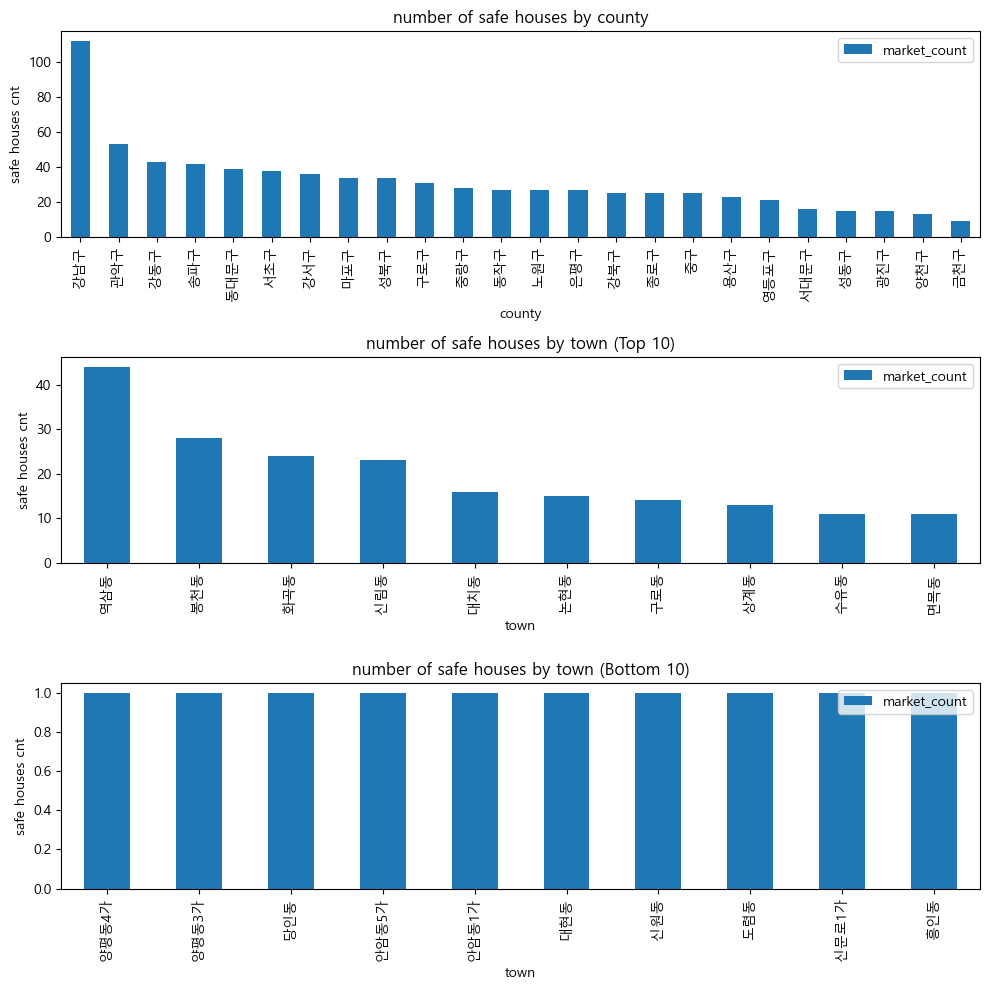

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
county_counts.sort_values(by='market_count', ascending=False).plot(kind='bar', x='county_name', y='market_count', ax=axes[0])
axes[0].set_title('number of safe houses by county')
axes[0].set_xlabel('county')
axes[0].set_ylabel('safe houses cnt')

town_counts.sort_values(by='market_count', ascending=False).head(10).plot(kind='bar', x='town_name', y='market_count', ax=axes[1])
axes[1].set_title('number of safe houses by town (Top 10)')
axes[1].set_xlabel('town')
axes[1].set_ylabel('safe houses cnt')

town_counts.sort_values(by='market_count', ascending=False).tail(10).plot(kind='bar', x='town_name', y='market_count', ax=axes[2])
axes[2].set_title('number of safe houses by town (Bottom 10)')
axes[2].set_xlabel('town')
axes[2].set_ylabel('safe houses cnt')

plt.tight_layout()
plt.show()